In [3]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
from pandas import Series

In [4]:
train_data = pd.read_csv(r"C:/01 Projects/07 Personal_Projects/06 Hackathon/01_WNS_Analytics_Wizard/train_NA17Sgz/train.csv")
train_data.shape

(237609, 7)

In [5]:
train_data.dtypes

impression_id      object
impression_time    object
user_id             int64
app_code            int64
os_version         object
is_4G               int64
is_click            int64
dtype: object

In [6]:
train_data.impression_time = pd.to_datetime(train_data.impression_time)

In [7]:
train_data.dtypes

impression_id              object
impression_time    datetime64[ns]
user_id                     int64
app_code                    int64
os_version                 object
is_4G                       int64
is_click                    int64
dtype: object

In [11]:
train_data["hour"] = train_data.impression_time.dt.hour

In [12]:
train_data["weekday"] = train_data.impression_time.dt.weekday

In [13]:
train_data.dtypes

impression_id              object
impression_time    datetime64[ns]
user_id                     int64
app_code                    int64
os_version                 object
is_4G                       int64
is_click                    int64
hour                        int64
weekday                     int64
dtype: object

In [100]:
model_df = train_data[["user_id","weekday","hour","os_version","is_4G"]]

In [101]:
y = train_data["is_click"]

In [102]:
model_df.head()

,user_id,weekday,hour,os_version,is_4G
0,87862,3,0,old,0
1,63410,3,0,latest,1
2,71748,3,0,intermediate,1
3,69209,3,0,latest,1
4,62873,3,0,latest,0


In [18]:
# dummy encoding 
#app_code_dummies = pd.get_dummies(model_df['app_code'],prefix='app_code')
#model_df = pd.concat([model_df,app_code_dummies],axis=1)

In [103]:
os_version_dummies = pd.get_dummies(model_df['os_version'],prefix='os_version')
model_df = pd.concat([model_df,os_version_dummies],axis=1)

In [104]:
weekday_dummies = pd.get_dummies(model_df['weekday'],prefix='weekday')
model_df = pd.concat([model_df,weekday_dummies],axis=1)

In [105]:
hour_dummies = pd.get_dummies(model_df['hour'],prefix='hour')
model_df = pd.concat([model_df,hour_dummies],axis=1)

In [65]:
model_df.head()

,weekday,hour,os_version,is_4G,os_version_intermediate,os_version_latest,os_version_old,weekday_0,weekday_1,weekday_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3,0,old,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,latest,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,intermediate,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,latest,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,latest,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
user_id_dummies = pd.get_dummies(model_df['user_id'],prefix='user_id')
model_df = pd.concat([model_df,user_id_dummies],axis=1)

MemoryError: 

In [77]:
model_df_X = model_df_X.drop("os_version",axis=1)
#model_df_X = model_df

In [83]:
model_df_X.head()

,is_4G,os_version_intermediate,os_version_latest,os_version_old,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
X = np.asarray(model_df_X)
X[0:5]

array([[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [85]:
y = np.asarray(y)
y [0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [86]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.75, -0.55, -1.09,  1.87, -0.42, -0.48, -0.39,  2.45, -0.39,
        -0.39, -0.39,  3.19, -0.22, -0.14, -0.08, -0.07, -0.08, -0.11,
        -0.15, -0.16, -0.19, -0.2 , -0.2 , -0.21, -0.21, -0.22, -0.23,
        -0.24, -0.25, -0.25, -0.25, -0.26, -0.26, -0.26, -0.24],
       [ 1.33, -0.55,  0.92, -0.53, -0.42, -0.48, -0.39,  2.45, -0.39,
        -0.39, -0.39,  3.19, -0.22, -0.14, -0.08, -0.07, -0.08, -0.11,
        -0.15, -0.16, -0.19, -0.2 , -0.2 , -0.21, -0.21, -0.22, -0.23,
        -0.24, -0.25, -0.25, -0.25, -0.26, -0.26, -0.26, -0.24],
       [ 1.33,  1.81, -1.09, -0.53, -0.42, -0.48, -0.39,  2.45, -0.39,
        -0.39, -0.39,  3.19, -0.22, -0.14, -0.08, -0.07, -0.08, -0.11,
        -0.15, -0.16, -0.19, -0.2 , -0.2 , -0.21, -0.21, -0.22, -0.23,
        -0.24, -0.25, -0.25, -0.25, -0.26, -0.26, -0.26, -0.24],
       [ 1.33, -0.55,  0.92, -0.53, -0.42, -0.48, -0.39,  2.45, -0.39,
        -0.39, -0.39,  3.19, -0.22, -0.14, -0.08, -0.07, -0.08, -0.11,
        -0.15, -0.16, -0

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (190087, 35) (190087,)
Test set: (47522, 35) (47522,)


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.96, 0.04],
       [0.96, 0.04],
       [0.96, 0.04],
       ...,
       [0.94, 0.06],
       [0.96, 0.04],
       [0.95, 0.05]])

In [91]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\08_Installations\anaconda\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9550313538992466

In [92]:
# Decision tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [93]:
def get_result(y_validation,predicted):
    print("F1_Score: " + str(f1_score(y_validation, predicted, average='macro')))
    print ("accuracy: " + str(accuracy_score(y_validation, predicted)))
    print ("AUC: " + str(roc_auc_score(y_validation, predicted)))
    print ("recall: " + str(recall_score(y_validation, predicted)))
    return

In [94]:
get_result(y_test,yhat)

F1_Score: 0.4884992519401121
accuracy: 0.9550313538992466
AUC: 0.5
recall: 0.0


C:\08_Installations\anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [95]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[    0  2137]
 [    0 45385]]


Confusion matrix, without normalization
[[    0  2137]
 [    0 45385]]


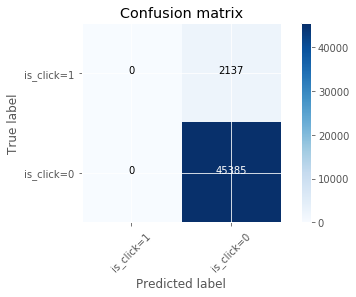

In [96]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['is_click=1','is_click=0'],normalize= False,  title='Confusion matrix')

In [99]:
y_test.mean() * 47522

2137.0